## Introduction


*   NumPy is the fundamental package for scientific computing in Python.
*   At the core of the NumPy package, is the **ndarray** object, which is a **n-dimensional** array of **homogeneous data types**
* Properties of Numpy arrays:
   1. They have fixed size at creation
   2. The elements in a NumPy array are all required to be of the same data type <font color="red">(There is an exception to this though!!)</font>


* There are two important features of NumPy:
    - Vectorization: absence of explicit looping, indexing etc. in the code
    - Broadcasting: let's us perform operations on arrays of different shapes

* By default all the operations of NumPy arrays are **element-by-element**


References:

https://numpy.org/doc/2.0/user/index.html


https://sebastianraschka.com/blog/2020/numpy-intro.html#n-dimensional-arrays

## Table of Contents

1. Array Creation Methods
2. Array Indexing
3. Broadcasting
4. Array Math and Universal functions
5. Random Number Generators
6. Linear Algebra

In [ ]:
import numpy as np

In [ ]:
# Why is it important to know that? Answer it yourself with the reason.
print(np.__version__)

2.0.2


In [ ]:
dir(np)
# help(np.diag)

## 1. Array Creation Methods

### a) Conversion from other python structures (i.e. lists and tuples)

In [ ]:
a = [1, 2, 3] # a list will create a 1D array
b = (4, 5, 6) # a tuple will create a 1D array

# a list of list will create a 2D array
a2 = [[1, 2, 3], [4, 5, 6]]

arr = np.array(a)
arr2 = np.array(b, dtype=float)

arr_2d = np.array(a2)

# Further nested structures will create higher dimensional arrays

In [ ]:
print(a)
print(type(a))
print(arr2)
print(type(arr2[0]))

[1, 2, 3]
<class 'list'>
[4. 5. 6.]
<class 'numpy.float64'>


In [ ]:
print(arr.dtype)

int64


In [ ]:
# If we want to construct NumPy arrays of different types, we can pass an argument to the dtype parameter of the array function,
#for example np.int32, to create 32-bit arrays.
#For a full list of supported data types, please refer to the official NumPy documentation.



In [ ]:
t3 = np.array((127.466666666, 129, 126), dtype='int16')

In [ ]:
print(t3)

[127 129 126]


In [ ]:
#Once an array has been constructed, we can downcast or recast its type via the astype method as shown in the following examples:

# t3 = t3.astype('int')
t3 = np.astype(t3, 'int8')

In [ ]:
# print(t3[0])
# print(type(t3[0]))
print(t3)
# print(t4)

[ 127 -127  126]


### Array attributes
NumPy arrays have several key attributes that provide information about their properties:

* ndim: The number of dimensions of the array (also known as its axes).
* shape: A tuple representing the size of the array along each dimension.
* size: The total number of elements in the array.
* dtype: The data type of the array's elements.

In [ ]:
# Create a 2D array
a = np.array([[1, 2, 3], [4, 5, 6]])

# # Number of dimensions
# print(a.ndim)  # Output: 2

# # Shape of the array (rows, columns)
# print(a.shape)  # Output: (2, 3)

# # Total number of elements
# print(a.size)  # Output: 6

print(len(a)) # Why 2?


# A number of oft used constants are defined in the numpy package
# These include numpy.inf, numpy.e, numpy.pi

print(np.inf, np.e, np.pi)

# numpy constants are documented at: https://numpy.org/doc/stable/reference/constants.html


2
inf 2.718281828459045 3.141592653589793


#### Extra
You can also create arrays using dictionary.

### b) Using Numpy Array Creation Functions

In [ ]:
# numpy.arange creates arrays with regularly incrementing values.

# arr = np.arange(0, 10, 1) # start and stop need to be int or real
# print(arr)
# print(type(arr))
# print(arr.shape)

# When to use linspace: 1) if you want the endpoint to be included in the result 2)if you are using a non-integer step size.

# arr2 = np.linspace([0, 1, 2], 10, num=4, endpoint=True, retstep=True) # start and stop can be int, real, complex or array like
# # arr2 = np.linspace([0, 1, 2], 10, num=4, endpoint=False, retstep=False) # returns a tuple if true
print(arr2)
print(type(arr2))
print(len(arr2))
# print(arr2.shape)

# axis is relevant when start and step are array like
# arr2 = np.linspace([0, 1, 2], [10, 11, 12], num=10, endpoint=True, retstep=False, axis=1)
# print(arr2)
# print(arr2.shape)

(array([[ 0.        ,  1.        ,  2.        ],
       [ 3.33333333,  4.        ,  4.66666667],
       [ 6.66666667,  7.        ,  7.33333333],
       [10.        , 10.        , 10.        ]]), array([3.33333333, 3.        , 2.66666667]))
<class 'tuple'>
2


AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
# Create an array filled with zeros
zeros_array = np.zeros((2,5,3))
print(f"Zeros Array: {zeros_array}")

# Create an array filled with ones
ones_array = np.ones(5, dtype=np.int32)
print(f"Ones Array: {ones_array}")  # Output: Ones Array: [1 1 1 1 1]

# Create an empty array
empty_array = np.empty((2,2))
print(f"Empty Array: {empty_array}")  # Output: Empty Array: [ ... values may vary ...]

identity_array = np.eye(3, 4, k=0, order='C')
print(f"Identity Array: {identity_array}")

# Return an array of zeros with the same shape and type as a given array.
# ex. np.zeros_like, np.ones_like, np.full_like
like_array = np.zeros_like(ones_array)
print(f"like_array: ", like_array)

Zeros Array: [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Ones Array: [1 1 1 1 1]
Empty Array: [[0. 1.]
 [2. 3.]]
Identity Array: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
like_array:  [0 0 0 0 0]


## Reshaping Arrays

In [ ]:
a = np.arange(1, 11)
b = a.reshape(2, 5) # Rule: Total no. of elements must remain same
print(b[0][1])
print(b[0,1])

# print(a)
# print(np.shares_memory(a, b))  # True (view, not copy)
f = a.copy()
print(f)

# c = a.reshape(-1, 2) # automatic dimension inference: only 1 dimension can be -1

d = np.arange(6)
print(np.reshape(d, (2, 3), order='C')) # read/write in row first manner
# # [[0 1 2]
# #  [3 4 5]]

print(np.reshape(d, (2, 3), order='F')) # read/write in column first manner
# [[0 2 4]
#  [1 3 5]]


2
2
[ 1  2  3  4  5  6  7  8  9 10]
[[0 1 2]
 [3 4 5]]
[[0 2 4]
 [1 3 5]]


In [ ]:
a = np.arange(60)
b = a.reshape(3, 4, 5)

print(b.shape)   # (3, 4, 5)
print(b[1, :, :])

(3, 4, 5)
[[20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]]


## 2. Array Indexing

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
print(a[0])

1


In [ ]:
print(b[0])
# print(b[0][1])
# print(b[0,1])

In [ ]:
print(b[0, -1])

3


In [ ]:
arr = np.arange(0, 11)
print(arr)

In [ ]:
arr[0:5:2]

array([0, 2, 4])

In [ ]:
print(b[:,-2])

[2 5]


In [ ]:
# Basic Indexing Examples
arr = np.array([1, 2, 3, 4, 5])
print("Original array:", arr)
print("First element:", arr[0])
print("Last element:", arr[-1])

# Slicing
print("Elements from index 1 to 3:", arr[1:4])
print("Elements from the beginning to index 2:", arr[:3])
print("Elements from index 3 to the end:", arr[3:])
print("Every other element:", arr[::2])

# Indexing in 2D arrays
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\nOriginal 2D array:\n", arr_2d)
print("Element at row 0, column 1:", arr_2d[0, 1])
print("First row:", arr_2d[0, :])
print("Second column:", arr_2d[:, 1])
print("Slice of the 2D array:\n", arr_2d[:2, 1:])

Original array: [1 2 3 4 5]
First element: 1
Last element: 5
Elements from index 1 to 3: [2 3 4]
Elements from the beginning to index 2: [1 2 3]
Elements from index 3 to the end: [4 5]
Every other element: [1 3 5]

Original 2D array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Element at row 0, column 1: 2
First row: [1 2 3]
Second column: [2 5 8]
Slice of the 2D array:
 [[2 3]
 [5 6]]


In [ ]:
# Advanced indexing
# Advanced indexing happens when the “selection object” you use to index an array is not a simple scalar or slice.
# There are two types of advanced indexing integer and boolean

# 1. A non-tuple sequence
x = np.arange(5)
print(x)? # advanced boolean indexing
# print(new.shape)

# 2. An ndarray of integers or booleans
# idx = np.array([0, 2, 4])
# x[idx]  # advanced integer indexing
# mask = np.array([True, False, True, False, True])
# x[mask] # advanced boolean indexing



SyntaxError: invalid syntax (ipython-input-2295104968.py, line 7)

In [ ]:
print(x)

[0 1 2 3 4]


In [ ]:
mask = x > 2
print(mask)
x[mask]

[False False False  True  True]


array([3, 4])

## 3. Broadcasting

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2, 2, 2])
print(a*b)

[2. 4. 6.]


In [ ]:
x = 2 # 1. memory and compute efficiency 2. When shape don't match
print(a*x)

[2. 4. 6.]


In [ ]:
# General rules of broadcasting
# Two dimensions are compatible when they are  equal 2. one of them is 1


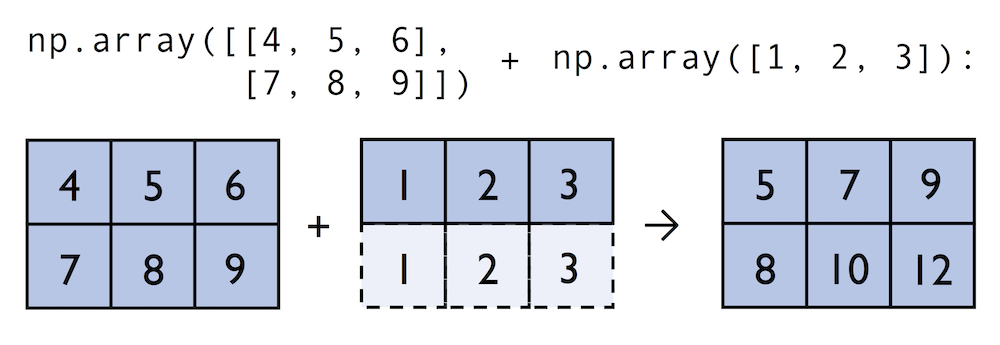

In [ ]:
arr1 = np.array([[4, 5, 6], [7, 8, 9]])
arr2 = np.array([1, 2, 3])

In [ ]:
print(arr1.shape, arr2.shape)

(2, 3) (3,)


In [ ]:
sum1 = arr1 + arr2
print(sum1)
print(sum1.shape)

[[ 5  7  9]
 [ 8 10 12]]
(2, 3)


In [ ]:
print(type(sum1))

<class 'numpy.ndarray'>


In [ ]:
print(sum1)

[[ 5  7  9]
 [ 8 10 12]]


A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5

For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

## 4. Array Math and Universal Functions
- A universal function (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features.
- That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs.

-While we typically use for-loops if we want to perform arithmetic operations on sequence-like objects, NumPy provides vectorized wrappers for

In [ ]:
lst = [[1, 2, 3],
       [4, 5, 6]] # 2d array

for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
lst

[[2, 3, 4], [5, 6, 7]]

In [ ]:
# We can accomplish the same using NumPy’s ufunc for element-wise scalar addition as shown below:
ary = np.array([[1, 2, 3], [4, 5, 6]])
ary = np.add(ary, 1) # binary ufunc
ary

array([[2, 3, 4],
       [5, 6, 7]])

In [ ]:
# The ufuncs for basic arithmetic operations are
# 1) add 2)subtract 3)divide  4)multiply 5)power 6)exp (exponential).

#  However, NumPy uses operator overloading so that we can use mathematical operators (+, -, /, *, and **) directly:
ary + 1

array([[3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.power(ary,2)
ary ** 2

array([[ 4,  9, 16],
       [25, 36, 49]])

In [ ]:
# NumPy implements several useful unary ufuncs, such as log (natural logarithm), log10 (base-10 logarithm), and sqrt (square root)
np.sqrt(ary)

array([[1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131]])

In [ ]:
#Often, we want to compute the sum or product of array element along a given axis.
# For this purpose, we can use a ufunc’s reduce operation. By default, reduce applies an operation along the first axis (axis=0).

ary = np.array([[1, 2, 3],
                [4, 5, 6]]) # rolling over the 1st axis, axis 0

np.add.reduce(ary, axis=1)

# we also have dtype keyword in reduce,
# The dtype keyword allows you to alter the data type over which the reduction takes place (and therefore the type of the output).

array([ 6, 15])

### Other useful unary ufuncs are:

- np.mean (computes arithmetic mean or average)
- np.std (computes the standard deviation)
- np.var (computes variance)
- np.sort (sorts an array)
- np.argsort (returns indices that would sort an array)
- np.min (returns the minimum value of an array)
- np.max (returns the maximum value of an array)
- np.argmin (returns the index of the minimum value)
- np.argmax (returns the index of the maximum value)
- np.array_equal (checks if two arrays have the same shape and elements)

## 5. Random number generators
- In machine learning and deep learning, we often have to generate arrays of random numbers – for example, the initial values of our model parameters before optimization.
- NumPy has a random subpackage to create random numbers and samples from a variety of distributions conveniently.

In [ ]:
# We will create a Generator instance with default_rng
# rng = np.random.default_rng()

# We can also pass seed for reproducibility
rng = np.random.default_rng(seed=42)

## call the various methods on it to obtain samples from different distributions.

# Generate one random float uniformly distributed over the range [0, 1)
# a = rng.random()
# print(a)

# num1 = rng.integers(low=0,high=5)
# num2 = rng.integers(5)
# print(num1)
# print(num2)

# b = rng.standard_normal(10)
# print(b)

# c = rng.standard_normal((2, 4))
# print(c)
# print(c.shape)

d = rng.normal(loc=0.0, scale=1.0, size=(3,))
# print(d)

# print(help(rng))

## 6. Linear Algebra

In [ ]:
a = np.arange(10)

In [ ]:
a = a.reshape(-1, -1)

ValueError: can only specify one unknown dimension

In [ ]:
print(a.shape)

(5, 2)


In [ ]:
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
masked = np.where(a>2, False, True)

In [ ]:
print(masked)

[ True  True  True False False False False False False False]


In [ ]:
x = np.arange(10)
x[masked]

array([0, 1, 2])

In [ ]:
# Matrix multiplication
a = np.arange(10)


b = np.arange(10).reshape(2, -1)
print(a)
print(b)
# print(a@b)
# print(np.matmul(a,b))
# print(np.dot(a,b))

# Singular Value Decomposition
c = np.arange(9).reshape(3,3)
c = np.linalg.svd(a)
print(c)

# # To compute eigenvalues and eigenvectors of a square array
# d = np.linalg.eig(np.array(range(9)).reshape(3,3))
# print(d)

# # For general matrix
# e = np.linalg.eigvals(np.array(range(9)).reshape(3,3))
# print(e)

# # Inverse of a matrix
# f = np.array([[1, 2], [3, 4]])
# invf = np.linalg.inv(f)
# print(invf)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
SVDResult(U=array([[-0.04514198, -0.77328016, -0.3545375 , -0.36504752, -0.37555754],
       [-0.21235854, -0.50488004, -0.04008557,  0.35761581,  0.7553172 ],
       [-0.37957509, -0.23647992,  0.87009952, -0.14090063, -0.15190078],
       [-0.54679164,  0.0319202 , -0.20179231,  0.6691439 , -0.45991989],
       [-0.7140082 ,  0.30032032, -0.27368413, -0.52081157,  0.232061  ]]), S=array([16.86109454,  0.83874363]), Vh=array([[-0.64858381, -0.76114325],
       [ 0.76114325, -0.64858381]]))
